<a href="https://colab.research.google.com/github/johanhoffman/methods-in-computational-science/blob/main/MICS_Approximation_theoahfeldt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4: Approximation
**Theo Puranen Åhfeldt**

# **Abstract**

The objective of this report is to implement $L^2$ projection for approximating real-valued functions. By defining an inner product over functions, $L^2$ projection becomes analogous to orthogonal projection of vectors onto vector subspaces. The main challenge is keeeping track of indices for the basis functions that are piecewise linear functions. It is easy to test that the projection is close to the exact function by plotting.

# **About the code**

This report is written by Theo Puranen Åhfeldt based on a template by Johan Hoffman.

In [1]:
# Copyright (C) 2020,2021 Johan Hoffman (jhoffman@kth.se)
# Copyright (C) 2021 Theo Puranen Åhfeldt (tahfeldt@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This file is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

# **Set up environment**

To have access to the neccessary modules you have to run this cell.

In [2]:
# Load neccessary modules.
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

# **Introduction**

The idea behind $L^2$ projection is very similar to projection of vectors, where we have a basis of functions that span a subspace instead of vectors. By defining an inner product over functions we can use the same methods for finding the projection using the properties of orthogonality. The basis is defined by the mesh, with one hat function centered at each point, supported by the neighbouring points.  

# **Method**

Numpy arrays are used to represent vectors and matrices. The integration required to calculate the inner products is implemented in two ways. First using scipy's `integration.quad` for $(f, \phi_i)$, where $f$ is the exact function we want to approximate and $\phi_i$ a basis function. Then using an analytic solution for the case of two basis functions, $(\phi_i, \phi_j)$. An assembly system is used to construct the matrix $A$ and vector $b$ of the linear equation $A\alpha = b$, which when solved gives the coordinates of the projected function in the basis $\{\phi_i\}$.

## L2 projection to pw linear approximation over mesh in 1D

To compute the $L^2$ projection we will need to compute:

$$(f, \phi_i) = \int_a^b f(x)\phi_i(x) dx = \int_{I_i} f(x)\phi_i(x) dx + \int_{I_{i+1}} f(x)\phi_i(x) dx$$

Since $f$ can be any function it is not possible to come up with a general analytical solution. Therefor we will use a numerical approach using scipy. Since we will iterate through one interval at a time we will only compute half of the integral at a time, which will then be added together in the assembly system.

In [3]:
def integrate_vector(f, k, i, xs):
    prod = lambda x: f(x)*(x - xs[k + 1 - i])/(xs[k + i] - xs[k + 1 - i])
    return integrate.quad(prod, xs[k], xs[k + 1])[0]

For integration $(\phi_i, \phi_j)$, we have an analytical solution. According to the calculations (9.17-19) from the lecture notes, $(\phi_i, \phi_j)$ is equal to $\frac{h}{6}$ when $|i - j| = 1$ and $\frac{h}{3}$ when $i = j$, where $h$ is length of the interval.

In [4]:
def integrate_matrix(k, i ,j, xs):
    h = xs[k + 1] - xs[k]
    return h/3 if i == j else h/6

We can now iterate through all intervals of the mesh, calculate the inner product of the local functions and add it all up in the matrix $A$ and vector $b$.

In [5]:
def assembly_system(f, xs):
    n = len(xs)
    A = np.zeros((n, n))
    b = np.zeros(n)
    for k in range(n - 1):
        q = 2
        A_loc = np.zeros((q, q))
        b_loc = np.zeros(q)
        for i in range(q):
            b_loc[i] = integrate_vector(f, k, i, xs)
            for j in range(q):
                A_loc[i,j] = integrate_matrix(k, i, j, xs)
        b[k:k+q] += b_loc
        A[k:k+q, k:k+q] += A_loc
    return A, b

Now that we have the assembly system, we just have to solve the equaition $A\alpha = b$ to find the coordinates of our $L^2$ projection.

In [6]:
def L2_projection(f, xs):
    A, b = assembly_system(f, xs)
    return np.linalg.solve(A, b)

# **Results**

Since the $L^2$ projection is a piecewise linear function that takes the values $\alpha$ at the corresponding $x$ coordinates, we can plot it simply by plotting $\alpha$ against our partition $x_0, \dots, x_{n}$. The following code cell plots the $L^2$ projection against the original function $f(x) = \cos{x}$ and shows that it is a good approximation:

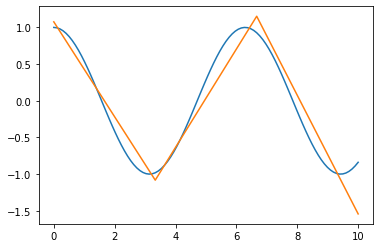

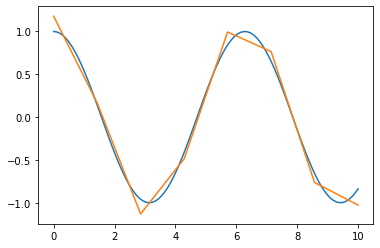

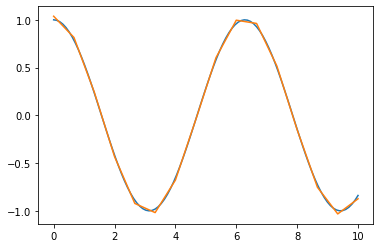

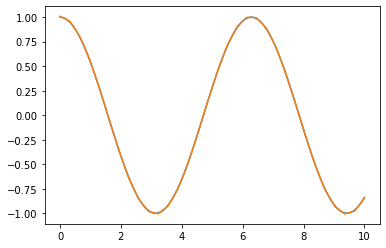

In [7]:
x = np.linspace(0,10,100)
f = lambda x: np.cos(x)

for i in [4, 8, 16, 32]:
    xs = np.linspace(0,10,i)
    alpha = L2_projection(f, xs)

    plt.plot(x, f(x))
    plt.plot(xs, alpha)
    plt.show()

# **Discussion**

The plots shows that the projected function is very close to the exact function. The finer the mesh the better the approximation, but is not too bad even for meshes with low amounts of intervals. AssuiminThis should not be surprising assuming th